In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from config import get_cfg
from op import Operation

cfg = get_cfg()

operation = Operation(cfg)

2020-04-16 00:24:39,288 - /data/weishizheng/wuzhengtao/Segmentation/BrainSeg/op.py[line:80] - INFO: config:
exp_dir: ./exp
epochs: 256
lr: 0.001
weight_decay: 0.0005
momentum: 0.9
epsilon: 1e-08
is_class_weight: False
model_type: Mid2-Encoder
drop_rate: 0.2
sample_T: 30
is_test: True
data_name: brains18
n_classes: 9
batch_size: 16
num_workers: 8
folders: ['1', '5', '7', '4', '148', '070', '14']
is_tumor: False
val_folds: ['1']
train_folds: ['5', '7', '4', '148', '070', '14']
memory_gpu: [0, 3041, 4459, 11577]
device: cuda:3
cur_dir: ./exp/test-brains18=0416-002439
model_path: ./exp/test-brains18=0416-002439/model.pt
model_best_path: ./exp/test-brains18=0416-002439/model_best.pt
model_all_path: ./exp/test-brains18=0416-002439/model.pth
log_path: ./exp/test-brains18=0416-002439/exp.log
result_dir: ./exp/test-brains18=0416-002439/result
print_cfg: <function print_cfg at 0x7fc41065d8c0>
cfg2str: <function cfg2str at 0x7fc41065d560>
log: <Logger ./exp/test-brains18=0416-002439/exp.log (DEBU

In [86]:
operation.cfg.model_type = 'Mid2-Encoder'
operation.load(path='./exp/D-Mid2-Encoder-brains18=0416-002025/model.pt')

2020-04-16 01:13:20,547 - /data/weishizheng/wuzhengtao/Segmentation/BrainSeg/op.py[line:95] - INFO: Model param loaded from ./exp/D-Mid2-Encoder-brains18=0416-002025/model.pt


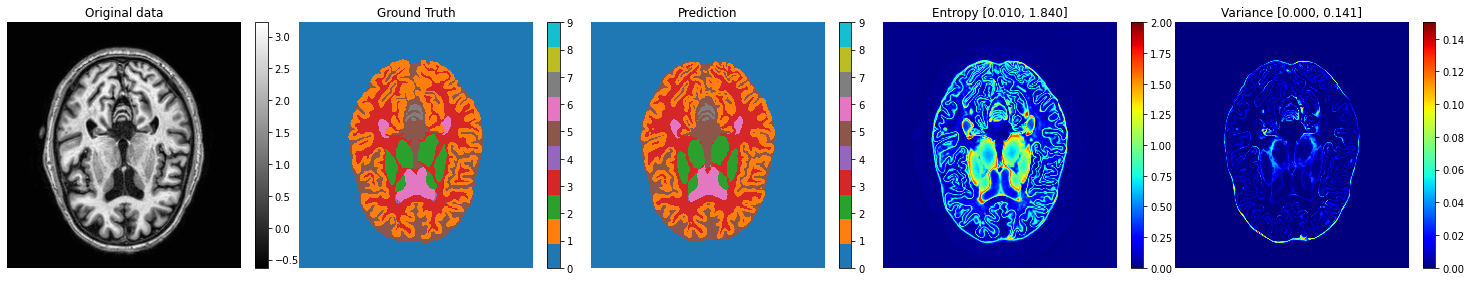

In [88]:
def show_result(data, ids):
    for i in ids:
        imgs, folder, slice_id = data[i]
        operation.predict_sample(imgs[2], imgs[3], title='{} {}'.format(folder, slice_id), sample=True)

# show_result(operation.val_data, [0])
# show_result(operation.val_data, [8])
# show_result(operation.val_data, [20])
# show_result(operation.val_data, [26])
# show_result(operation.val_data, [37])
# show_result(operation.val_data, [42])
# show_result(operation.val_data, [47])

# show_result(operation.train_data, [200])
show_result(operation.val_data, [20])
# show_result(operation.val_data, [22])
# show_result(operation.val_data, [24])
# show_result(operation.val_data, [26])

In [89]:
# 用loader评价模型，不采样
dices, loss = operation.eval_model(operation.val_loader)
print(dices[1:].mean())
dices, loss = operation.eval_model(operation.train_loader)
print(dices[1:].mean())

[   3/   3] 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| /
0.8203381958107154
[  18/  18] 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| |
0.8077239027867714


In [35]:
# 用data评价模型，不采样
dice1, dice2 = operation.eval_model_dices(operation.val_data)
dice1, dice2 = operation.eval_model_dices(operation.train_data)

[  48/  48] 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| -2020-04-16 00:53:19,610 - /data/weishizheng/wuzhengtao/Segmentation/BrainSeg/op.py[line:245] - INFO: 
2020-04-16 00:53:19,611 - /data/weishizheng/wuzhengtao/Segmentation/BrainSeg/op.py[line:246] - INFO: Class     : ['  0', '  1', '  2', '  3', '  4', '  5', '  6', '  7', '  8'] [c1-c8 mean]
2020-04-16 00:53:19,613 - /data/weishizheng/wuzhengtao/Segmentation/BrainSeg/op.py[line:247] - INFO: Total dice: [0.989, 0.824, 0.798, 0.815, 0.604, 0.656, 0.828, 0.834, 0.662] [0.753]
2020-04-16 00:53:19,615 - /data/weishizheng/wuzhengtao/Segmentation/BrainSeg/op.py[line:248] - INFO: Bottomdice: [0.982, 0.838, 0.938, 0.749, 0.938, 0.470, 0.752, 0.684, 0.486] [0.732]
2020-04-16 00:53:19,616 - /data/weishizheng/wuzhengtao/Segmentation/BrainSeg/op.py[line:249] - INFO: Mid   dice: [0.990, 0.800, 0.456, 0.865, 0.063, 0.719, 0.731, 0.819, 0.500] [0.619]
2020-04-16 00:53:19,618 - /data/weishizheng/wuzhengtao/Segmentation/BrainSeg/op.py

In [90]:
# 评价val，采样
# operation.cfg.sample_T = 30
dice1, dice2 = operation.eval_sample_model_dices(operation.val_data, True)

[  48/  48] 100% |>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>| -2020-04-16 01:14:20,652 - /data/weishizheng/wuzhengtao/Segmentation/BrainSeg/op.py[line:245] - INFO: 
2020-04-16 01:14:20,654 - /data/weishizheng/wuzhengtao/Segmentation/BrainSeg/op.py[line:246] - INFO: Class     : ['  0', '  1', '  2', '  3', '  4', '  5', '  6', '  7', '  8'] [c1-c8 mean]
2020-04-16 01:14:20,654 - /data/weishizheng/wuzhengtao/Segmentation/BrainSeg/op.py[line:247] - INFO: Total dice: [0.995, 0.867, 0.901, 0.835, 0.628, 0.813, 0.949, 0.942, 0.952] [0.861]
2020-04-16 01:14:20,656 - /data/weishizheng/wuzhengtao/Segmentation/BrainSeg/op.py[line:248] - INFO: Bottomdice: [0.993, 0.877, 0.975, 0.855, 0.938, 0.783, 0.914, 0.885, 0.928] [0.894]
2020-04-16 01:14:20,657 - /data/weishizheng/wuzhengtao/Segmentation/BrainSeg/op.py[line:249] - INFO: Mid   dice: [0.995, 0.846, 0.728, 0.899, 0.135, 0.814, 0.933, 0.941, 0.928] [0.778]
2020-04-16 01:14:20,659 - /data/weishizheng/wuzhengtao/Segmentation/BrainSeg/op.py

In [ ]:
# 评价train，采样
dice1, dice2 = operation.eval_sample_model_dices(operation.train_data, True)

In [ ]:
import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss
import numpy as np
out = torch.Tensor(np.array([[
    [
        [1.,1, 1], 
        [0, 0, 0], 
        [0, 0, 0],
        [0, 0, 0]
    ],
    [
        [0, 0, 0],
        [1, 1, 1],
        [0, 0.,0],
        [0, 0, 0]
    ],
    [
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1],
        [0, 0, 0]
    ],
    [
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]
    ]
]]))

target = torch.Tensor([[
    [0, 0, 0],
    [1, 1, 1],
    [2, 2, 2],
    [3, 3, 3]
]]).type('torch.LongTensor')
criterion = CrossEntropyLoss()


In [ ]:
# print(out.shape)
# print(target.shape)
# print(criterion(out, target))
# values, indices = torch.max(out, dim=1)
# print(values, indices)
# print(indices.shape)

# print(target)
# print(target==3)
# print(np.sum(target.numpy()==3))

a = torch.zeros((2, 5, 5), dtype=torch.float)
print(a)
print(a.shape)
a[0] = 5
print(a)


In [ ]:
sm = nn.Softmax(dim=1)
print(sm(out))

In [ ]:
print(torch.log(sm(out)))

In [ ]:
loss = nn.NLLLoss()
print(loss(torch.log(sm(out)), target))

In [ ]:
print(np.zeros(4))

In [53]:
import torch
import torch.nn as nn

m = nn.Dropout(p=0.3)
input = torch.ones( 5, 5)
print(input)


tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [54]:
print(input.mean())

tensor(1.)


In [55]:
output = m(input)
print(output)

tensor([[1.4286, 1.4286, 1.4286, 1.4286, 1.4286],
        [0.0000, 0.0000, 1.4286, 0.0000, 1.4286],
        [0.0000, 0.0000, 1.4286, 0.0000, 1.4286],
        [1.4286, 0.0000, 0.0000, 1.4286, 1.4286],
        [1.4286, 1.4286, 1.4286, 0.0000, 1.4286]])


In [56]:
print(input/0.7)

tensor([[1.4286, 1.4286, 1.4286, 1.4286, 1.4286],
        [1.4286, 1.4286, 1.4286, 1.4286, 1.4286],
        [1.4286, 1.4286, 1.4286, 1.4286, 1.4286],
        [1.4286, 1.4286, 1.4286, 1.4286, 1.4286],
        [1.4286, 1.4286, 1.4286, 1.4286, 1.4286]])


In [61]:
print((output*.7).mean())

tensor(0.6400)


In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.current_stream())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name())

True
0
<torch.cuda.Stream device=cuda:0 cuda_stream=0x0>
8
GeForce GTX 1080 Ti


In [2]:
print(torch.cuda.current_device())
device = torch.device('cuda:7')
torch.cuda.set_device(device)
print(torch.cuda.current_device())


0
7


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
input = torch.ones( 5, 5)
print(input)
m = nn.Dropout(p=0.6)
m.train()
print(F.dropout(input, p=0.6, training=False))
print(m(input))
m.eval()
print(m(input))

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[0.0000, 2.5000, 2.5000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [2.5000, 0.0000, 0.0000, 0.0000, 2.5000],
        [0.0000, 0.0000, 2.5000, 0.0000, 2.5000],
        [2.5000, 2.5000, 0.0000, 2.5000, 0.0000]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
